# Old Faithful Geyser Data Set
The Old Faithful Geyser data set is a well-known data set that depicts the relationship of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA [webcam]. This data set is found in the base installation of the R programming language.

faithful is a data set with 272 observations on 2 variables.

Column name	Description
- eruptions	Eruption time (in mins)
- waiting	Waiting time to next eruption (in mins)
There is a function in statsmodels (or sm for short) called sm.datasets.get_rdataset which will download and return a data set found in R.

Let's import the faithful dataset.

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


In [3]:
faithful = sm.datasets.get_rdataset("faithful")

In [37]:
# Let's look at the help file
sm.datasets.get_rdataset?
faithful?

In [5]:
faithful.title

'Old Faithful Geyser Data'

In [6]:
faithful = faithful.data
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [7]:
faithful.tail()

,eruptions,waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


In [8]:
faithful.shape

(272, 2)

## Histogram

histogram of the time between eruptions

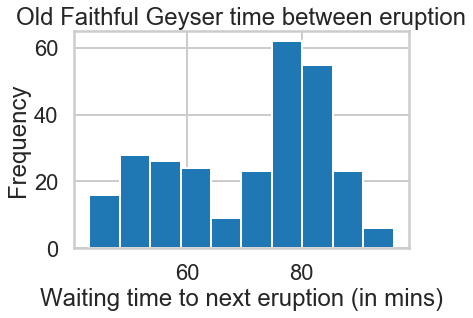

In [9]:
plt.hist(faithful.waiting)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Frequency')
plt.title('Old Faithful Geyser time between eruption')
plt.show()

## Scatter plot

scatter plot of the waiting on the x-axis and the eruptions on the y-axis

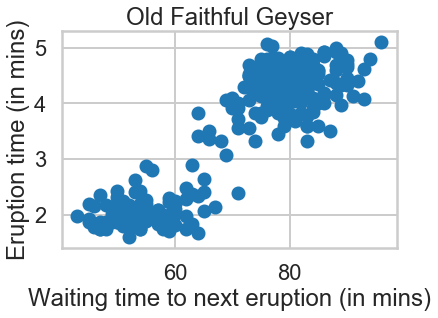

In [10]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')
plt.show()

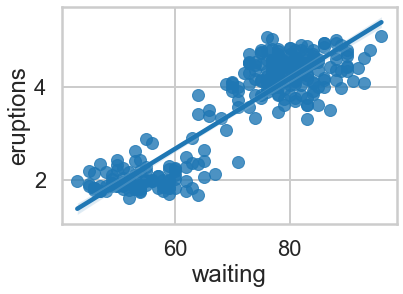

In [13]:
sns.regplot(y="eruptions", x="waiting", data=faithful, fit_reg = True)

## Build a linear regression to predict eruption time using statsmodels



Now let's build a linear regression model for the faithful DataFrame, and estimate the next eruption duration if the waiting time since the last eruption has been 75 minutes.

$$ Eruptions = \beta_0 + \beta_1 * Waiting + \epsilon $$

In [14]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y, X)

In [15]:
results = model.fit()

In [17]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              eruptions   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              9621.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                   9.97e-214
Time:                        23:09:15   Log-Likelihood:                         -250.30
No. Observations:                 272   AIC:                                      502.6
Df Residuals:                     271   BIC:                                      506.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
results.params.values

array([0.05012919])

In [19]:
X = sm.add_constant(X)
X.head()

,const,waiting
0,1.0,79
1,1.0,54
2,1.0,74
3,1.0,62
4,1.0,85


In [21]:
modelW0 = sm.OLS(y, X)
resultsW0 = modelW0.fit()
print( resultsW0.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          8.13e-100
Time:                        23:15:20   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

If you want to predict the time to the next eruption using a waiting time of 75, you can directly estimate this using the equation

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * 75 $$
or you can use results.predict.

In [22]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.798080109978967

In [23]:
resultsW0.predict(newX)


array([3.79808011])

Based on this linear regression, if the waiting time since the last eruption has been 75 minutes, we expect the next one to last approximately 3.80 minutes.

## Plot the regression line

Instead of using resultsW0.predict(X), we can use resultsW0.fittedvalues which are the $\hat{y}$.



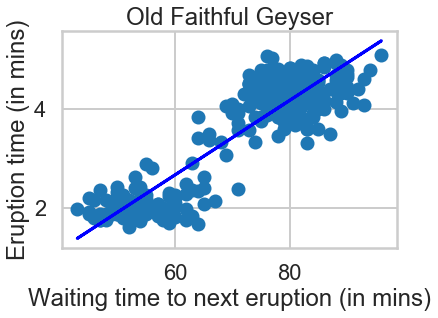

In [24]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()

## Residuals, residual sum of squares, mean squared error
Recall, we can directly calculate the residuals as

$$r_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$$
To calculate the residual sum of squares,

$$ S = \sum_{i=1}^n r_i = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $$
where $n$ is the number of observations. Alternatively, we can simply ask for the residuals using resultsW0.predict

In [26]:
resids = faithful.eruptions - resultsW0.predict(X)

In [27]:
resids = resultsW0.resid

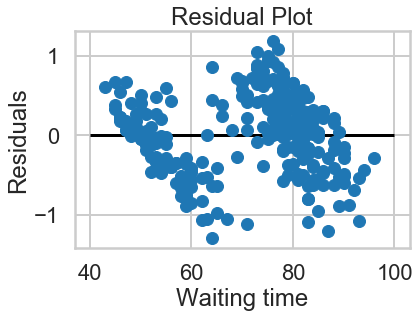

In [28]:
plt.plot(faithful.waiting, resids, 'o')
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [30]:
print(np.sum((faithful.eruptions - resultsW0.predict(X)) ** 2))

66.56177571269984


In [32]:
print(np.mean((faithful.eruptions - resultsW0.predict(X)) ** 2))

0.24471241070845534


## Build a linear regression to predict eruption time using least squares
Now let's build a linear regression model for the faithful DataFrame, but instead of using statmodels (or sklearn), let's use the least squares estimates of the coefficients for the linear regression model.

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$
The numpy function np.dot is the dot product (or inner product) of two vectors (or arrays in python).

The numpy function np.linalg.inv can be used to compute the inverse of a matrix.

In [33]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions

In [34]:
np.dot(X.T, X)


array([[2.720000e+02, 1.928400e+04],
       [1.928400e+04, 1.417266e+06]])

In [35]:
np.linalg.inv(np.dot(X.T, X))


array([[ 1.04029479e-01, -1.41547492e-03],
       [-1.41547492e-03,  1.99652136e-05]])

In [36]:
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print("Directly estimating beta:", beta)
print("Estimating beta using statmodels: ", resultsW0.params.values)

Directly estimating beta: [-1.87401599  0.07562795]
Estimating beta using statmodels:  [-1.87401599  0.07562795]
